# Network Intrusion Detection 

In [27]:
# import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score)
from sklearn.preprocessing import Normalizer
import h5py

from sklearn.metrics import confusion_matrix

In [28]:
# Load the data
import os
os.chdir(r"C:\Users\apega\My py notes\Deep Learning with python\Other files\Network Intrusion Detection data")

traindata = pd.read_csv('Training.csv', header=None)
testdata = pd.read_csv('Testing.csv', header=None)

# Data preprocessing

In [29]:
# Sampling
traindata = traindata.sample(30000)
testdata = testdata.sample(6000)

In [30]:
traindata[0].value_counts()

1    23942
0     6058
Name: 0, dtype: int64

In [31]:
testdata[0].value_counts()

1    4859
0    1141
Name: 0, dtype: int64

In [32]:
# Class count
count_class_1, count_class_0 = traindata[0].value_counts()

# Divide by class
df_train_class_0 = traindata[traindata[0] == 0]
df_train_class_1 = traindata[traindata[0] == 1]

In [33]:
# Oversample 

df_train_class_0_over = df_train_class_0.sample(count_class_1, replace=True)
df_train_over = pd.concat([df_train_class_1, df_train_class_0_over], axis=0)

print('Random over-sampling:')
print(df_train_over[0].value_counts())

Random over-sampling:
0    23942
1    23942
Name: 0, dtype: int64


In [34]:
# Class count
count_class_1, count_class_0 = testdata[0].value_counts()

# Divide by class
df_test_class_0 = testdata[testdata[0] == 0]
df_test_class_1 = testdata[testdata[0] == 1]

In [35]:
# Oversample

df_test_class_0_over = df_test_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_test_class_1, df_test_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over[0].value_counts())

Random over-sampling:
0    4859
1    4859
Name: 0, dtype: int64


In [36]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [37]:
X = df_train_over.iloc[:,1:5]
Y = df_train_over.iloc[:,0]
C = df_test_over.iloc[:,0]
T = df_test_over.iloc[:,1:5]

In [38]:
Y.value_counts()

0    23942
1    23942
Name: 0, dtype: int64

In [39]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

In [40]:
y_train = np.array(Y)
y_test = np.array(C)


X_train = np.array(trainX)
X_test = np.array(testT)

In [41]:
batch_size = 64

# Model

In [42]:
model = Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(700,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(300,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test,y_test))
model.save("Saved Models/dnn_model.h5")
print(model.summary)

Epoch 1/10
749/749 [==============================] - 9s 12ms/step - loss: 0.3129 - accuracy: 0.8746 - val_loss: 0.3237 - val_accuracy: 0.9182
Epoch 2/10
749/749 [==============================] - 8s 11ms/step - loss: 0.1058 - accuracy: 0.9752 - val_loss: 0.2207 - val_accuracy: 0.9513
Epoch 3/10
749/749 [==============================] - 9s 12ms/step - loss: 0.0821 - accuracy: 0.9829 - val_loss: 0.2255 - val_accuracy: 0.9510
Epoch 4/10
749/749 [==============================] - 8s 11ms/step - loss: 0.0767 - accuracy: 0.9856 - val_loss: 0.2454 - val_accuracy: 0.9510
Epoch 5/10
749/749 [==============================] - 8s 11ms/step - loss: 0.0777 - accuracy: 0.9840 - val_loss: 0.2480 - val_accuracy: 0.9509
Epoch 6/10
749/749 [==============================] - 9s 12ms/step - loss: 0.0758 - accuracy: 0.9843 - val_loss: 0.2074 - val_accuracy: 0.9510
Epoch 7/10
749/749 [==============================] - 9s 12ms/step - loss: 0.0729 - accuracy: 0.9859 - val_loss: 0.2261 - val_accuracy: 0.9511

# Plots

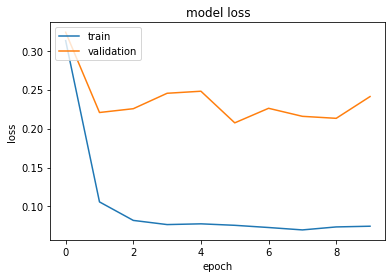

In [43]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

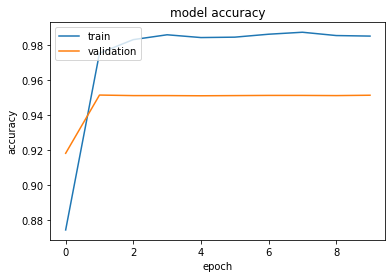

In [44]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Accuraacy 

In [45]:
model.evaluate(X_test, y_test)

304/304 [==============================] - 1s 2ms/step - loss: 0.2411 - accuracy: 0.9512


[0.24112242460250854, 0.9512245059013367]

# Predictions

In [46]:
y_pred = model.predict(X_test)
y_pred[5:10]

array([[0.9954904],
       [0.9954904],
       [0.9954904],
       [0.9954904],
       [0.9954904]], dtype=float32)

In [47]:
y_pred1 = []
for element in y_pred:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [48]:
y_pred1[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [49]:
y_test[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [52]:
#Classification Report
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4859
           1       1.00      0.90      0.95      4859

    accuracy                           0.95      9718
   macro avg       0.96      0.95      0.95      9718
weighted avg       0.96      0.95      0.95      9718



# Heat Map

Text(69.0, 0.5, 'actual')

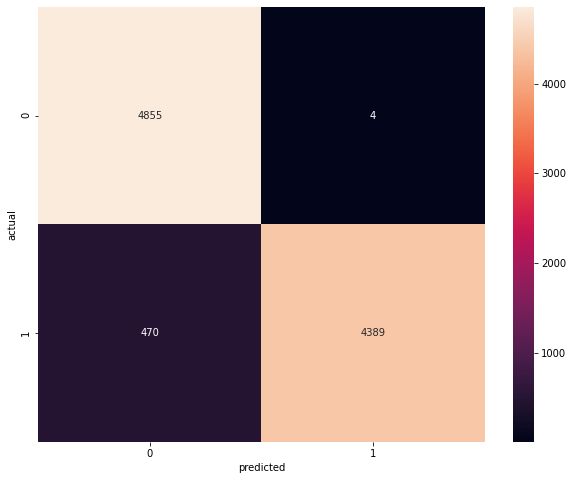

In [51]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred1)

plt.figure(figsize = (10,8))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("actual")

Medium article link: https://vomchaithanya.medium.com/network-intrusion-detection-ffb4d79f9edb